In [1]:
%matplotlib inline
import pandas as pd

In [2]:
compras_df = pd.read_csv('data/clean_compras.csv')

In [3]:
compras_df.head(5)

,NUM BEN,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS AF8458-158008-3972,OT. 20204373,REEMPLAZO E INSTALACION DE AMORTIGUADORES (DEL...,TR,1019110.0,2020-12-11,14911.80,GASTOS VARIOS
1,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF6916-158008-4041,OT. 20204425,REEMPLAZO E INSTALACION DE OCHO BIRLOS Y NUEVE...,TR,1019110.0,2020-12-11,2528.80,GASTOS VARIOS
2,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF6917-158008-3975,OT. 20204376,REEMPLAZO DE DOS RINES (17). PATRIMONIO 80383...,TR,1019110.0,2020-12-11,8500.02,GASTOS VARIOS
3,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF7004-158008-3971,OT. 20204374,REEMPLAZO DE DOS RINES (14). PATRIMONIO 8007...,TR,1019110.0,2020-12-11,2400.01,GASTOS VARIOS
4,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF7137-158008-4554,OT. 20205130,REEMPLAZO E INSTALACION DE RIN 14. PATRIMONIO ...,TR,299001496.0,2020-12-23,1537.00,GASTOS VARIOS


## Visión general del dataset

In [4]:
compras_df.columns

Index(['NUM BEN', 'BENEFICIARIO', 'RFC', 'FACTURA', 'CONTRATO', 'CONCEPTO',
       'TIPO', '# OP', 'FECHA', 'IMPORTE', 'SHEET'],
      dtype='object')

In [5]:
compras_df.dtypes

NUM BEN           int64
BENEFICIARIO     object
RFC              object
FACTURA          object
CONTRATO         object
CONCEPTO         object
TIPO             object
# OP            float64
FECHA            object
IMPORTE         float64
SHEET            object
dtype: object

In [6]:
compras_df.describe()

,NUM BEN,# OP,IMPORTE
count,1540.000000,1.540000e+03,1.540000e+03
mean,203914.777273,1.920050e+08,6.263179e+05
std,92435.932025,1.411189e+08,4.666912e+06
min,110152.000000,1.019042e+06,8.600000e-01
25%,116223.000000,1.019144e+06,2.987000e+03
50%,203013.000000,2.980000e+08,1.235584e+04
75%,311250.000000,3.000001e+08,1.130583e+05
max,370012.000000,6.040001e+08,1.267303e+08


In [7]:
compras_df = compras_df[['BENEFICIARIO', 'FACTURA', 'CONTRATO', 'CONCEPTO', 'TIPO', '# OP', 'FECHA', 'IMPORTE', 'SHEET']]

## Análisis unidimensional de las variables

In [8]:
compras_df['SHEET'].value_counts()

SHEET
CONTRATISTAS Y FDO FED    724
GASTOS VARIOS             690
COMUNICACION               71
SERV. PERS.                46
SERV PPROF                  9
Name: count, dtype: int64

In [9]:
len(compras_df['CONCEPTO'].unique())

1396

In [10]:
compras_df['BENEFICIARIO'].value_counts()[0:10]

BENEFICIARIO
CAMARA MEXICANA DE LA INDUSTRIA DE LA CONSTRUCCION    266
AUTOKAM REGIOMONTANA,S.A.DE C.V.                      101
CAR ONE MONTERREY, S.A. DE C.V.                        78
PEREZ RIOS RAMIRO                                      58
S.I.M.E.P.R.O.D.E.                                     50
INTERASFALTOS, S.A. DE C.V.                            45
GRUPO COYOTE MONTERREY, S.A. DE C.V.                   43
SERVICIO TECNICO CHURUBUSCO, S.A. DE C.V.              30
CFE SUMINISTRADOR DE SERVICIOS BASICOS                 29
CORDERO MACIAS SILVESTRE GUADALUPE                     27
Name: count, dtype: int64

<Axes: >

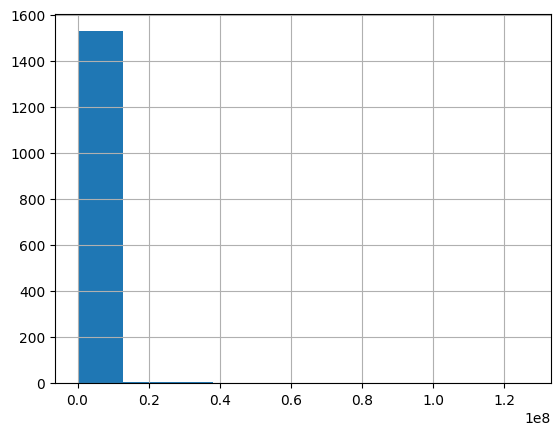

In [11]:
compras_df['IMPORTE'].hist()

<Axes: >

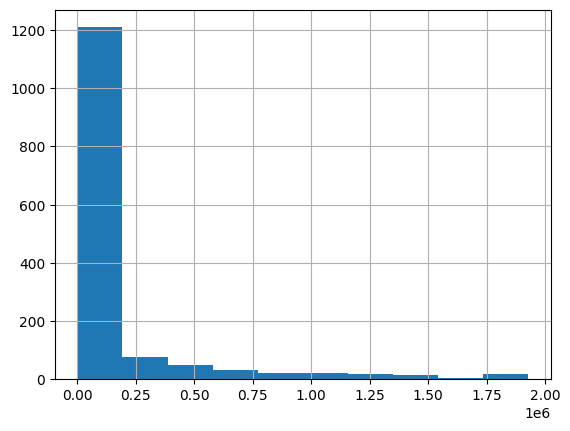

In [12]:
compras_df[compras_df['IMPORTE']< compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist()

<Axes: >

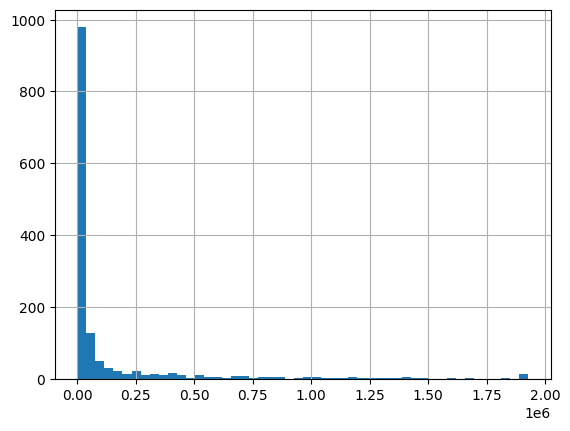

In [13]:
compras_df[compras_df['IMPORTE']< compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist(bins=50)

In [14]:
compras_df[compras_df['IMPORTE']< compras_df['IMPORTE'].quantile(0.95)].head(5)

,BENEFICIARIO,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS AF8458-158008-3972,OT. 20204373,REEMPLAZO E INSTALACION DE AMORTIGUADORES (DEL...,TR,1019110.0,2020-12-11,14911.80,GASTOS VARIOS
1,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF6916-158008-4041,OT. 20204425,REEMPLAZO E INSTALACION DE OCHO BIRLOS Y NUEVE...,TR,1019110.0,2020-12-11,2528.80,GASTOS VARIOS
2,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF6917-158008-3975,OT. 20204376,REEMPLAZO DE DOS RINES (17). PATRIMONIO 80383...,TR,1019110.0,2020-12-11,8500.02,GASTOS VARIOS
3,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF7004-158008-3971,OT. 20204374,REEMPLAZO DE DOS RINES (14). PATRIMONIO 8007...,TR,1019110.0,2020-12-11,2400.01,GASTOS VARIOS
4,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF7137-158008-4554,OT. 20205130,REEMPLAZO E INSTALACION DE RIN 14. PATRIMONIO ...,TR,299001496.0,2020-12-23,1537.00,GASTOS VARIOS


## Análisis multidimensional de las variables

In [15]:
sum_importe_beneficiario = compras_df.groupby('BENEFICIARIO').sum()['IMPORTE']

<Axes: xlabel='BENEFICIARIO'>

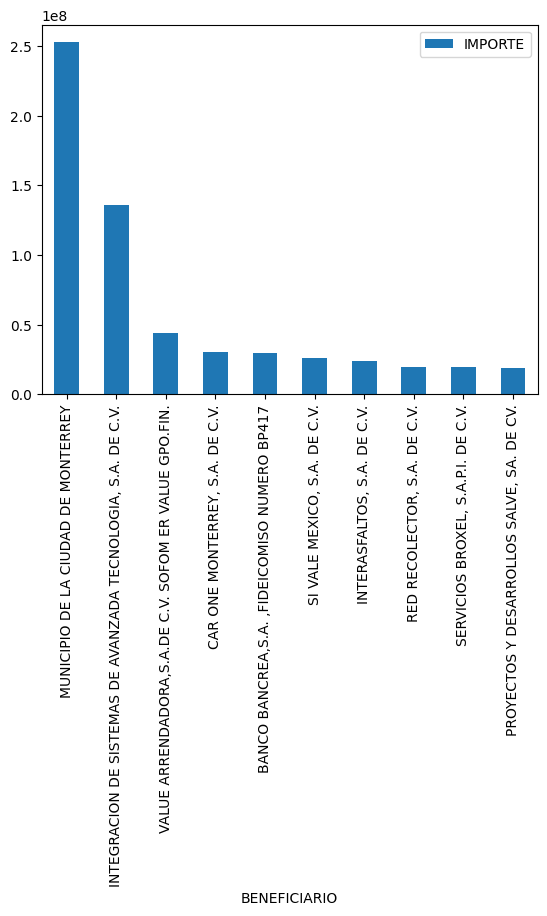

In [16]:
sum_importe_beneficiario.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar', x='BENEFICIARIO', y='IMPORTE')

In [17]:
compras_df.groupby(by = 'SHEET')['IMPORTE'].mean()

SHEET
COMUNICACION              109705.343662
CONTRATISTAS Y FDO FED    474566.765787
GASTOS VARIOS             881659.731797
SERV PPROF                229592.166667
SERV. PERS.                59623.405217
Name: IMPORTE, dtype: float64

In [18]:
mean_importe_sheet = compras_df.groupby('SHEET')['IMPORTE'].mean()

<Axes: xlabel='SHEET'>

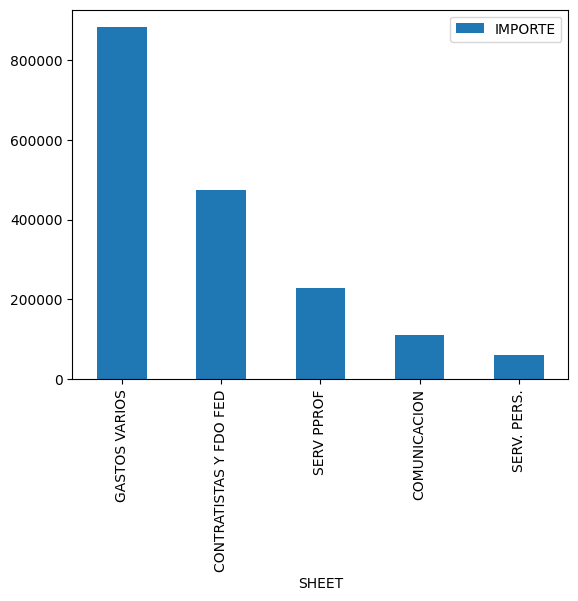

In [19]:
mean_importe_sheet.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar', x='SHEET', y='IMPORTE')

In [20]:
mean_importe_sheet.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10]

,SHEET,IMPORTE
2,GASTOS VARIOS,881659.731797
1,CONTRATISTAS Y FDO FED,474566.765787
3,SERV PPROF,229592.166667
0,COMUNICACION,109705.343662
4,SERV. PERS.,59623.405217


In [21]:
sum_importe_fecha = compras_df.groupby('FECHA').sum()["IMPORTE"]

In [22]:
sum_importe_fecha

FECHA
2020-12-01    2.453181e+04
2020-12-02    3.000000e+04
2020-12-03    1.313241e+05
2020-12-04    7.432247e+07
2020-12-07    1.815018e+06
2020-12-08    1.519824e+08
2020-12-09    4.659596e+05
2020-12-10    1.207010e+06
2020-12-11    1.127524e+08
2020-12-14    3.692338e+05
2020-12-15    1.826510e+04
2020-12-16    2.504067e+06
2020-12-17    1.735205e+08
2020-12-18    1.568875e+08
2020-12-21    9.441760e+05
2020-12-22    6.814845e+07
2020-12-23    3.328571e+07
2020-12-28    1.204764e+08
2020-12-29    2.050000e+05
2020-12-30    6.435889e+07
2020-12-31    1.080281e+06
Name: IMPORTE, dtype: float64

In [23]:
compras_gastos_df = compras_df[compras_df['SHEET'] == 'GASTOS VARIOS']

<Axes: >

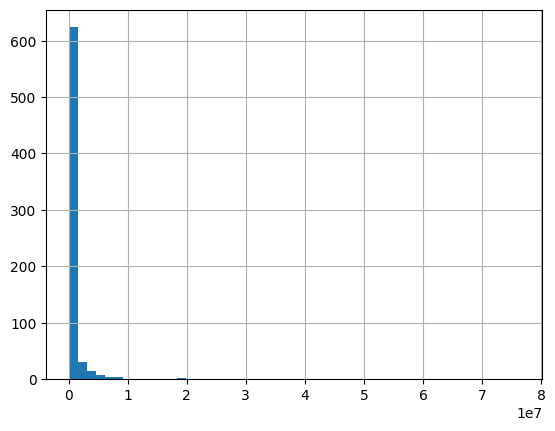

In [24]:
compras_gastos_df['IMPORTE'].hist(bins=50)

In [25]:
compras_df[compras_df['BENEFICIARIO'] == "MUNICIPIO DE LA CIUDAD DE MONTERREY"]['SHEET'].value_counts()

SHEET
GASTOS VARIOS             11
CONTRATISTAS Y FDO FED     5
Name: count, dtype: int64

In [26]:
compras_sheet_beneficiario = compras_df.groupby(['BENEFICIARIO', 'SHEET']).sum()['IMPORTE'].sort_values().unstack('SHEET')

In [27]:
compras_df.groupby(['BENEFICIARIO', 'SHEET']).sum()['IMPORTE'].sort_values()


BENEFICIARIO                                                  SHEET                 
CINEPOLIS DE MEXICO,S.A. DE C.V.                              GASTOS VARIOS             4.995600e+02
TIJERINA GOMEZ LUCAS OCTAVIO                                  GASTOS VARIOS             5.140200e+02
INSTITUTO DE CONTROL VEHICULAR                                GASTOS VARIOS             8.690000e+02
GARCIA ORTIZ ALMA ALICIA                                      GASTOS VARIOS             1.015160e+03
CORTES SANCHEZ VICTOR MANUEL                                  SERV. PERS.               1.099690e+03
                                                                                            ...     
SI VALE MEXICO, S.A. DE C.V.                                  GASTOS VARIOS             2.600384e+07
BANCO BANCREA,S.A. ,FIDEICOMISO NUMERO BP417                  GASTOS VARIOS             3.000000e+07
VALUE ARRENDADORA,S.A.DE C.V. SOFOM ER VALUE GPO.FIN.         GASTOS VARIOS             4.382056e+07
INTEGR

In [28]:
compras_df.groupby(['BENEFICIARIO', 'SHEET']).sum()['IMPORTE'].sort_values().unstack('SHEET')

SHEET,COMUNICACION,CONTRATISTAS Y FDO FED,GASTOS VARIOS,SERV PPROF,SERV. PERS.
BENEFICIARIO,,,,,
"235 PROYECTOS, S.A. DE C.V.",NaN,NaN,1649292.36,NaN,NaN
"ABC Y CONSTRUCCIONES, SA. DE CV.",NaN,1311087.9,NaN,NaN,NaN
"ACEROS Y OVEROLLINGS DE MEXICO, SA. DE CV.",NaN,NaN,5914.30,NaN,NaN
"ADQUISICIONES INTELIGENTES, S.A. DE C.V.",NaN,2132196.0,NaN,NaN,NaN
"ALIANZA AUTOMOTRIZ RIVERO, SA. DE CV.",NaN,NaN,450859.52,NaN,NaN
...,...,...,...,...,...
VILLARREAL CARDENAS JUAN IGNACIO,NaN,NaN,NaN,NaN,3733.13
VILLARREAL CARDENAS NANCY ESTHER,NaN,NaN,NaN,NaN,81461.14
VILLARREAL DE LEON BERTHA,NaN,NaN,11004.05,NaN,NaN


In [29]:
top_beneficiarios = compras_df.groupby('BENEFICIARIO')['IMPORTE'].sum().sort_values(ascending=False).index[0:10]

In [30]:
top_beneficiarios

Index(['MUNICIPIO DE LA CIUDAD DE MONTERREY',
       'INTEGRACION DE SISTEMAS DE AVANZADA TECNOLOGIA, S.A. DE C.V.',
       'VALUE ARRENDADORA,S.A.DE C.V. SOFOM ER VALUE GPO.FIN.',
       'CAR ONE MONTERREY, S.A. DE C.V.',
       'BANCO BANCREA,S.A. ,FIDEICOMISO NUMERO BP417',
       'SI VALE MEXICO, S.A. DE C.V.', 'INTERASFALTOS, S.A. DE C.V.',
       'RED RECOLECTOR, S.A. DE C.V.', 'SERVICIOS BROXEL, S.A.P.I. DE C.V.',
       'PROYECTOS Y DESARROLLOS SALVE, SA. DE CV.'],
      dtype='object', name='BENEFICIARIO')

In [31]:
compras_sheet_beneficiario.loc[top_beneficiarios]

SHEET,COMUNICACION,CONTRATISTAS Y FDO FED,GASTOS VARIOS,SERV PPROF,SERV. PERS.
BENEFICIARIO,,,,,
MUNICIPIO DE LA CIUDAD DE MONTERREY,NaN,3.412500e+04,2.526895e+08,NaN,NaN
"INTEGRACION DE SISTEMAS DE AVANZADA TECNOLOGIA, S.A. DE C.V.",NaN,1.281179e+08,7.493040e+06,NaN,NaN
"VALUE ARRENDADORA,S.A.DE C.V. SOFOM ER VALUE GPO.FIN.",NaN,NaN,4.382056e+07,NaN,NaN
"CAR ONE MONTERREY, S.A. DE C.V.",NaN,2.229764e+07,8.346672e+06,NaN,NaN
"BANCO BANCREA,S.A. ,FIDEICOMISO NUMERO BP417",NaN,NaN,3.000000e+07,NaN,NaN
"SI VALE MEXICO, S.A. DE C.V.",NaN,NaN,2.600384e+07,NaN,NaN
"INTERASFALTOS, S.A. DE C.V.",NaN,NaN,2.404647e+07,NaN,NaN
"RED RECOLECTOR, S.A. DE C.V.",NaN,1.951267e+07,NaN,NaN,NaN
"SERVICIOS BROXEL, S.A.P.I. DE C.V.",NaN,NaN,1.941272e+07,NaN,NaN


<Axes: xlabel='BENEFICIARIO'>

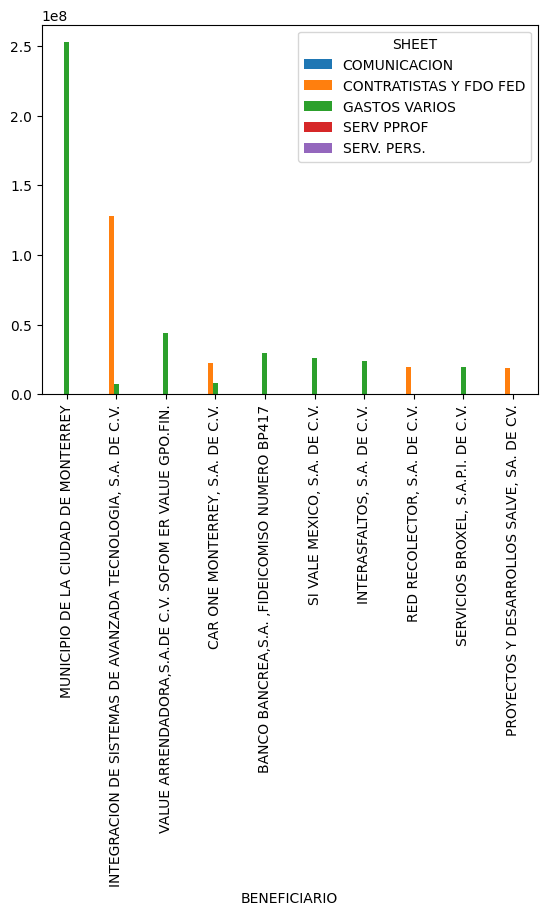

In [32]:
compras_sheet_beneficiario.loc[top_beneficiarios].plot.bar()

<Axes: xlabel='BENEFICIARIO'>

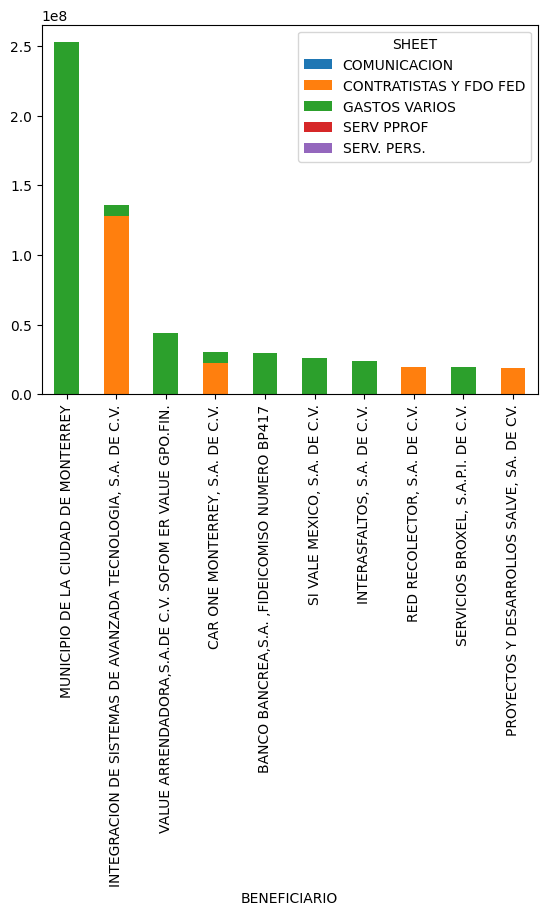

In [33]:
compras_sheet_beneficiario.loc[top_beneficiarios].plot.bar(stacked=True)

## Análisis de texto

In [36]:
!pip install nltk

In [37]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('spanish'))

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/bpizarro/nltk_data'
    - '/opt/anaconda3/nltk_data'
    - '/opt/anaconda3/share/nltk_data'
    - '/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
textos_compras = ''
for row in compras_df['CONCEPTO']: 
    textos_compras = textos_compras + ' ' + row

In [ ]:
stopwords_list = stopwords.words('spanish') + ['2020', 'cont', 'millar', 'dpp', 'est', 'op', 'ret', 'mty', 'icom']

In [ ]:
textos_compras = ' '.join([x for x in textos_compras.strip().lower().split(' ') if x not in stopwords_list and len(x)>4])

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

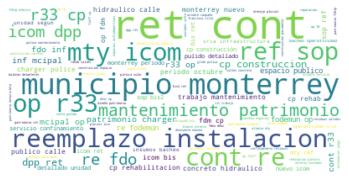

In [ ]:
wc = WordCloud(background_color= 'white')
wc.generate(textos_compras)

plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()